In [1]:
# visualisation
import matplotlib.pyplot as plt

# data analysis
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

Step one is to get the data and have a look at what is inside. The sklearn library has many datasets available which can be loaded. Here we load the Wine dataset and take a look at the description of the dataset to learn some more about what is contained within:

In [2]:
wine = datasets.load_wine()
print(wine['DESCR'][:500])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

 


In [3]:
print(wine.data.shape)
print(wine.target.shape)

(178, 13)
(178,)


In [4]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


So far we have learned that the dataset contains 178 samples (rows) and 13 features (columns) that detail various components contained within the wine. 
There are three classes named 'class_0', 'class_1', and 'class_2'. 
The next step is to build a pandas DataFrame to hold the data. The dataframe will help when manipulating the features.

In [5]:
features = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data = features
data['target']=wine['target']
data['class']=data['target'].map(lambda ind: wine['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


The lambda function is used within the map function to substitute each value in the 'target' series for corresponding target names in the wine dataset.
The head() function returns the first $n$ rows. This is useful when checking that the dataframe is holding the data of interest, in a format we understand.

In [6]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


The describe() function in Pandas generates descriptive statistics.
From the example above, the highest alcohol percentage value is 14.83%, and the lowest is 11.03%, while the mean is 13%.
From here we can look at the distribution of a feature, lets have a look at the distribution of total phenol content. The phenolic content of wine includes a large group of several hundred chemical compounds that affect the taste, color and mouthfeel of the wine. Using the seaborn distplot function:



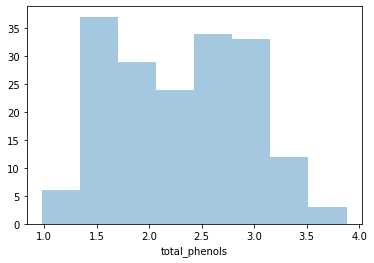

In [7]:
sns.distplot(data['total_phenols'],kde=0)

The above figure plots the distrbution of total phenols among all of the wines.

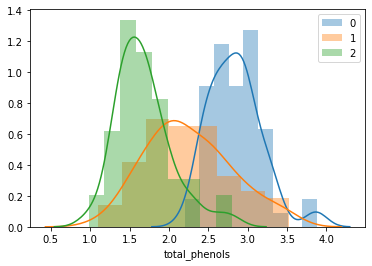

In [8]:
for i in data.target.unique():
    sns.distplot(data['total_phenols'][data.target==i],
                 kde=1,label='{}'.format(i))
                 
plt.legend()

The distribution of total phenols content by class. The three classes appear to naturally separate as low/mid/high total phenols distrubtions. Next we can look at the distributions of the classes for the rest of the features. For this we can use Seaborn's .kdeplot() function to cleanly distinguish each class. However, note that this scales the y-axis so that the integral under each curve is 1.

alcohol


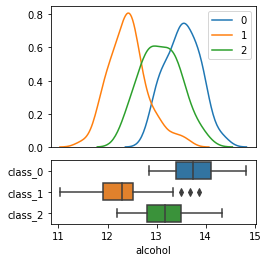

malic_acid


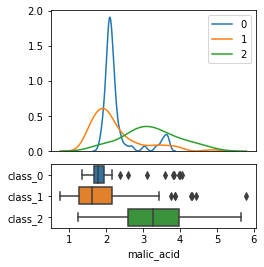

ash


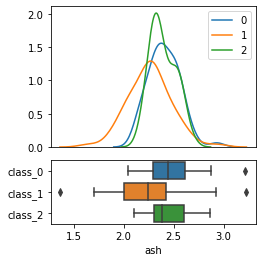

alcalinity_of_ash


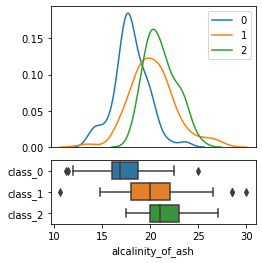

magnesium


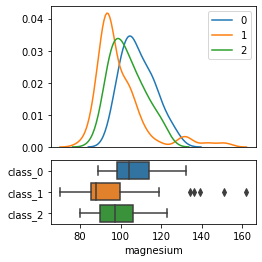

total_phenols


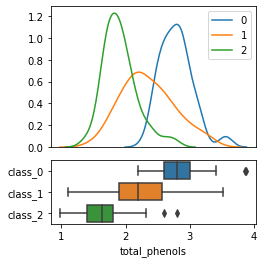

flavanoids


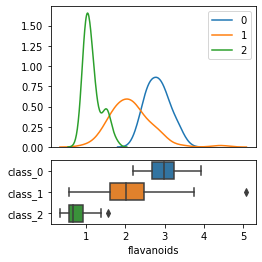

nonflavanoid_phenols


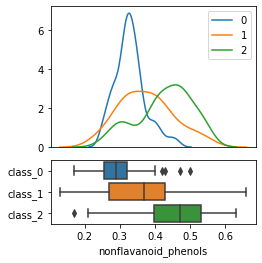

proanthocyanins


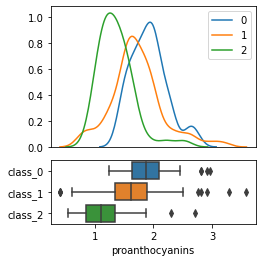

color_intensity


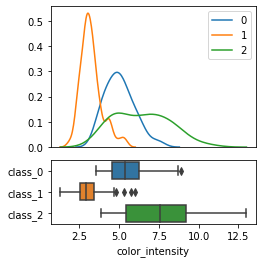

hue


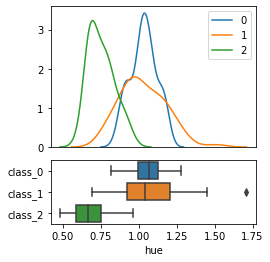

od280/od315_of_diluted_wines


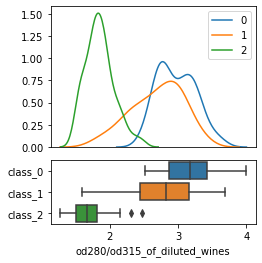

proline


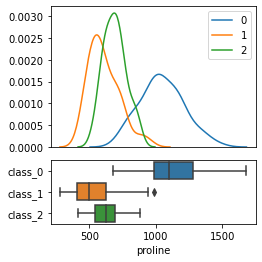

In [9]:
import matplotlib.gridspec as gridspec
for feature in wine['feature_names']:
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=data,ax=ax2)
    sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
    sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

Kernel density estimation (KDE) is used here to visualize the "shape" of each feature. This represents an estimate of the distribution for each feature, and the result is a curve. This is related to a histogram in that it is a representation of distribution. KDE takes a parameter called "bandwidth" that affects the "smoothness" of the curve. The higher the bandwidth number, the smoother the curve. The "kernel function" represents how the data points distance are weighted.
From the box plots of the Flavanoids, Total Phenols and Alcohol features, it is clear the class distributions have noticeably different means. From this we can go on to expect that simple models may be sufficent to distinguish between wines.

### Explore Different Models

The wine data is now loaded and some exploration has yielded some useful insights. The next step is to import and instantiate some classification algorithms. From this list of algorithms we can choose the most appropriate and strongest performing to distinguish between wines.

It is not a good idea to evaluate the model with the same data used to build the model. In order to see if the model will generalize well (perform well on new data) it will be stronger to use a different dataset.
This can be achieved by splitting the dataset. This can be split into two parts:

* training data
* test data

Within the scikit-learn library there exists a function that can split datasets. This function is called train_test_split. This function extracts 75% of the initial dataset, including the corresponding labels of this portion of the data. Whats remains is 25% of the original dataset, together with the corresponding labels for this data. This is declared as the test set.

In [10]:
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = \
    train_test_split(wine['data'],wine['target'],
                     test_size=0.2)
print(len(data_train),' samples in training data\n',
      len(data_test),' samples in test data\n', )

142  samples in training data
 36  samples in test data



It is difficult to know which classifcation algorithm will perform the strongest. To make this problem more manageable, it is a good idea to look at multiple algorithms and pick the one that performs best. This can be done by creating a dict of all of the scikit-learn classifiers. A dict is a dictionary that is indexed by keys. Keys can be any immutable type, meaning they can be strings or numbers. Dicts can be thought of as key:value pairs, with the requirement that keys are always unique (within dicts).

GridSearchCV is used in the following code block to find the optimal hyperparameters for each of the classifcation algorithms included in the dict.
This is because some classifiers depend on one or more hyperparameters or regularization techniques whose optimal values are not known ahead of time. GridSearchCV optimizes the given parameters by cross-validating the grid search over the parameter grid: 

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier

dict_classifiers = {
    "Logistic Regression": 
            {'classifier': LogisticRegression(),
                'params' : [
                            {
                             'penalty': ['l1','l2'],
                             'C': [0.001,0.01,0.1,1,10,100,1000]
                            }
                           ]
            },
    "Nearest Neighbors": 
            {'classifier': KNeighborsClassifier(),
                 'params': [
                            {
                            'n_neighbors': [1, 3, 5, 10],
                            'leaf_size': [3, 30]
                            }
                           ]
            },
             
    "Linear SVM": 
            {'classifier': SVC(),
                 'params': [
                            {
                             'C': [1, 10, 100, 1000],
                             'gamma': [0.001, 0.0001],
                             'kernel': ['linear']
                            }
                           ]
            },
    "Gradient Boosting Classifier": 
            {'classifier': GradientBoostingClassifier(),
                 'params': [
                            {
                             'learning_rate': [0.05, 0.1],
                             'n_estimators' :[50, 100, 200],
                             'max_depth':[3,None]
                            }
                           ]
            },
    "Decision Tree":
            {'classifier': tree.DecisionTreeClassifier(),
                 'params': [
                            {
                             'max_depth':[3,None]
                            }
                             ]
            },
    "Random Forest": 
            {'classifier': RandomForestClassifier(),
                 'params': {}
            },
    "Naive Bayes": 
            {'classifier': GaussianNB(),
                 'params': {}
            }
}

In [12]:
from sklearn.model_selection import learning_curve 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.6, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [15]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
num_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(
        data=np.zeros(shape=(num_classifiers,4)),
        columns = ['classifier',
                   'train_score', 
                   'test_score',
                   'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.perf_counter()
        grid = GridSearchCV(classifier['classifier'], 
                      classifier['params'],
                      refit=True,
                        cv = 10, # 9+1
                        scoring = 'accuracy', # scoring metric
                        n_jobs = -1
                        )
        estimator = grid.fit(X_train,
                             Y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start
        train_score = estimator.score(X_train,
                                      Y_train)
        test_score = estimator.score(X_test,
                                     Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key,
                                                    f=t_diff))
        count+=1
        plot_learning_curve(estimator, 
                              "{}".format(key),
                              X_train,
                              Y_train,
                              ylim=(0.75,1.0),
                              cv=10)
    return df_results

trained Logistic Regression in 3.05 s
trained Nearest Neighbors in 0.31 s
trained Linear SVM in 3.28 s
trained Gradient Boosting Classifier in 16.96 s
trained Decision Tree in 0.05 s
trained Random Forest in 0.92 s
trained Naive Bayes in 0.03 s


,classifier,train_score,test_score,training_time
5,Random Forest,1.000000,1.000000,0.915964
2,Linear SVM,1.000000,0.944444,3.281615
3,Gradient Boosting Classifier,1.000000,0.944444,16.956820
6,Naive Bayes,0.978873,0.916667,0.025726
4,Decision Tree,0.978873,0.888889,0.045786
0,Logistic Regression,0.964789,0.861111,3.047712
1,Nearest Neighbors,1.000000,0.666667,0.313669


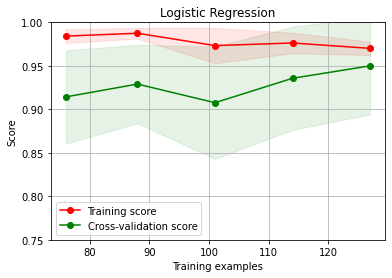

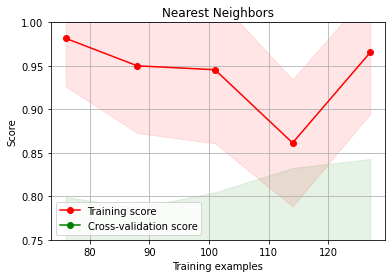

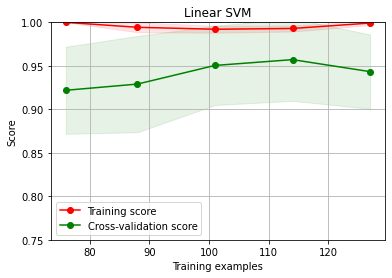

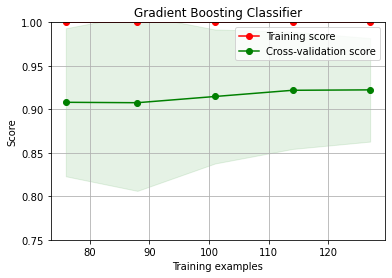

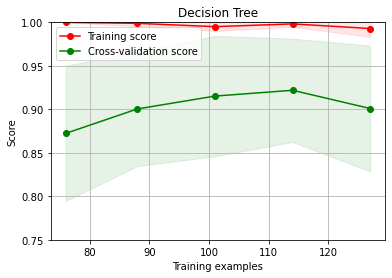

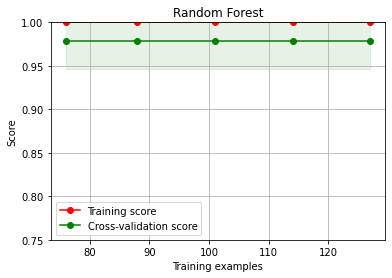

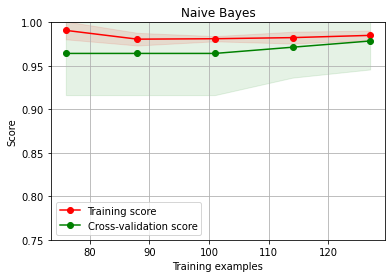

In [16]:

df_results = batch_classify(data_train, label_train, data_test, label_test)
display(df_results.sort_values(by='test_score', ascending=False))